# PARTIE INTEL IMAGES


In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [38]:
# --- 1. Définition des chemins de données ---
base_dir = "./Intel_Images/Intel_Images"  # Chemin vers le dossier parent des données
train_dir = "./Intel_Images/Intel_Images/seg_train/seg_train"  # Dossier pour l'entraînement
test_dir = "./Intel_Images/Intel_Images/seg_test/seg_test"   # Dossier pour le test
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [54]:
# --- 2. Paramètres ---
image_size = (150, 150) # Taille des images
batch_size = 64        # Nombre d'images par lot
epochs = 20         # Nombre d'itérations d'entraînement

In [40]:
# --- 3. Préparation des générateurs d'images ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# --- 4. Chargement des données avec flow_from_directory ---
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Classification multiclasse
    classes=classes
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical', # Classification multiclasse
    classes=classes
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [45]:
# --- 5. Construction du modèle CNN ---
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))  # Softmax pour la sortie multiclasse


In [46]:
# --- 6. Compilation du modèle ---
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
# Calculer les steps_per_epoch et validation_steps
steps_per_epoch = training_set.samples // batch_size
validation_steps = test_set.samples // batch_size

# --- 7. Entraînement du modèle avec des logs ---
print("Entraînement du modèle CNN...")
history = model.fit(
    training_set,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=validation_steps
)

Entraînement du modèle CNN...
Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 28s 124ms/step - accuracy: 0.8063 - loss: 0.5518 - val_accuracy: 0.8512 - val_loss: 0.4358
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 122ms/step - accuracy: 0.8121 - loss: 0.5206 - val_accuracy: 0.8349 - val_loss: 0.4544
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.8750 - loss: 0.2038 - val_accuracy: 0.8214 - val_loss: 0.3628
Epoch 4/20


c:\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


219/219 ━━━━━━━━━━━━━━━━━━━━ 28s 124ms/step - accuracy: 0.8133 - loss: 0.5140 - val_accuracy: 0.8370 - val_loss: 0.4881
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 122ms/step - accuracy: 0.8184 - loss: 0.5202 - val_accuracy: 0.8471 - val_loss: 0.4250
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - accuracy: 0.9062 - loss: 0.1676 - val_accuracy: 0.7679 - val_loss: 0.4965
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 28s 126ms/step - accuracy: 0.8385 - loss: 0.4719 - val_accuracy: 0.8322 - val_loss: 0.4812
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 52s 236ms/step - accuracy: 0.8251 - loss: 0.4795 - val_accuracy: 0.8451 - val_loss: 0.4602
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - accuracy: 0.8125 - loss: 0.2727 - val_accuracy: 0.8214 - val_loss: 0.2827
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 97s 440ms/step - accuracy: 0.8398 - loss: 0.4421 - val_accuracy: 0.8322 - val_loss: 0.4991
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 70s 320ms/step - accuracy: 0.8401 - loss: 0.4501 - val

In [56]:
# --- 8. Évaluation du modèle ---
loss, accuracy = model.evaluate(test_set)
print(f"Perte sur le jeu de test : {loss:.4f}")
print(f"Précision sur le jeu de test : {accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8503 - loss: 0.4399
Perte sur le jeu de test : 0.4255
Précision sur le jeu de test : 0.8587


In [57]:
import random

def predict_image(image_path):
    img = image.load_img(image_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = classes[predicted_class_index]
    probability = prediction[0][predicted_class_index]
    print(f"L'image {image_path} est classifiée comme : {predicted_class_name} (probabilité : {probability:.2f})")

def apply_predict_to_random_images(folder_path, num_images=10):
    # Lister tous les fichiers dans le dossier
    all_files = os.listdir(folder_path)
    
    # Filtrer pour ne garder que les fichiers d'image (par exemple, .jpg, .png)
    image_files = [f for f in all_files if f.endswith(('.jpg', '.png'))]
    
    # Sélectionner 10 fichiers aléatoirement
    selected_files = random.sample(image_files, num_images)
    
    # Appliquer la fonction predict_image à chaque fichier sélectionné
    for image_file in selected_files:
        image_path = os.path.join(folder_path, image_file)
        predict_image(image_path)

# Utilisation de la fonction
apply_predict_to_random_images('Intel_Images/Intel_Images/seg_pred/seg_pred')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
L'image Intel_Images/Intel_Images/seg_pred/seg_pred\13751.jpg est classifiée comme : buildings (probabilité : 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
L'image Intel_Images/Intel_Images/seg_pred/seg_pred\12015.jpg est classifiée comme : glacier (probabilité : 0.95)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
L'image Intel_Images/Intel_Images/seg_pred/seg_pred\918.jpg est classifiée comme : mountain (probabilité : 0.99)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
L'image Intel_Images/Intel_Images/seg_pred/seg_pred\12804.jpg est classifiée comme : glacier (probabilité : 0.96)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
L'image Intel_Images/Intel_Images/seg_pred/seg_pred\11192.jpg est classifiée comme : glacier (probabilité : 0.70)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
L'image Intel_Images/Intel_Images/seg_pred/seg_pred\14939.jpg est classifiée comme : sea (probabilité : 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
L'image Intel_Images/Intel_Images/seg_pred/seg_pred\2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━

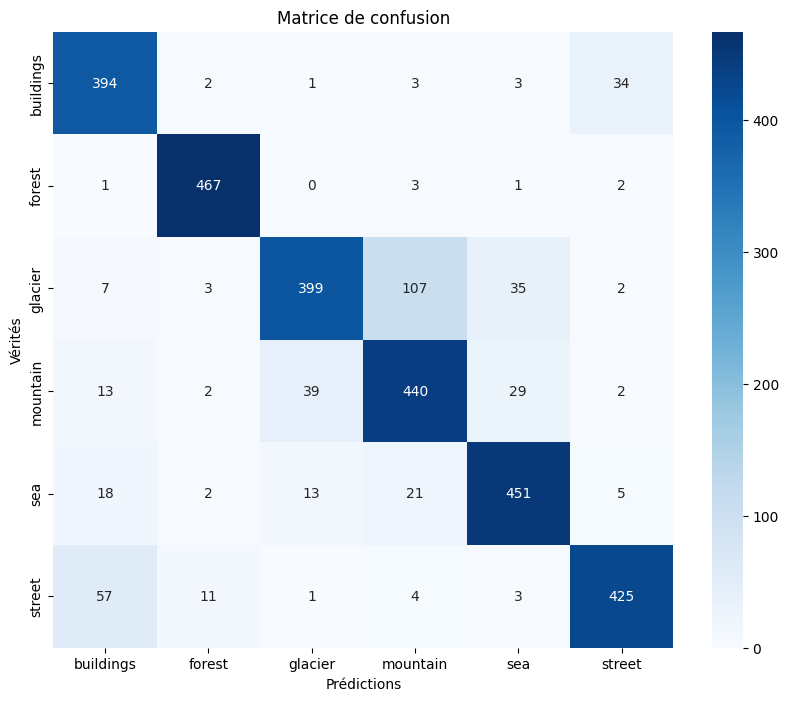

In [58]:
# --- 12. Matrice de confusion ---
y_pred = []
y_true = []
for images, labels in test_set:
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(np.argmax(labels, axis=1))
    if len(y_true) >= test_set.samples:
        break

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de confusion")
plt.show()

In [59]:
# --- 13. Rapport de classification ---
print(classification_report(y_true, y_pred, target_names=classes))

              precision    recall  f1-score   support

   buildings       0.80      0.90      0.85       437
      forest       0.96      0.99      0.97       474
     glacier       0.88      0.72      0.79       553
    mountain       0.76      0.84      0.80       525
         sea       0.86      0.88      0.87       510
      street       0.90      0.85      0.88       501

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



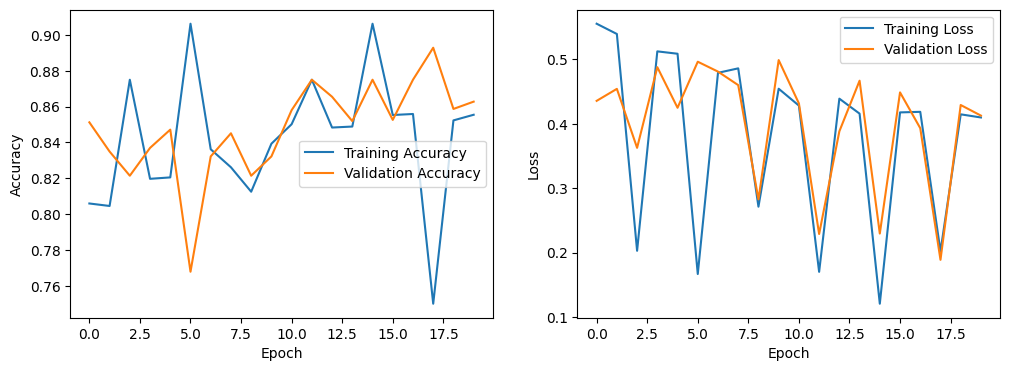

In [60]:
# --- 15. Courbes d'apprentissage ---
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

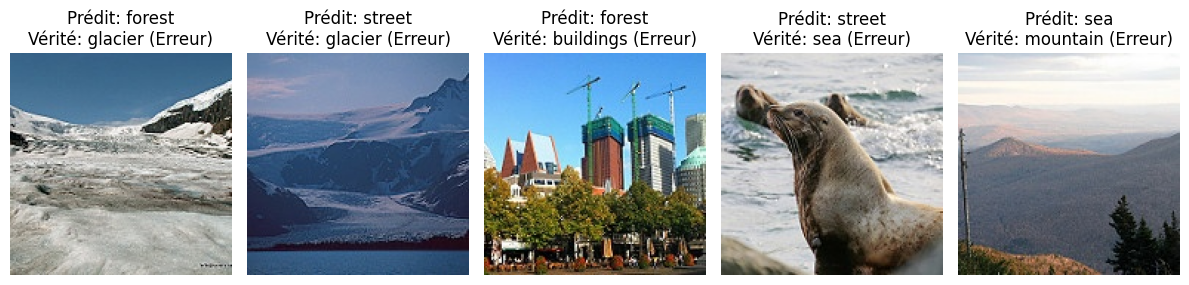

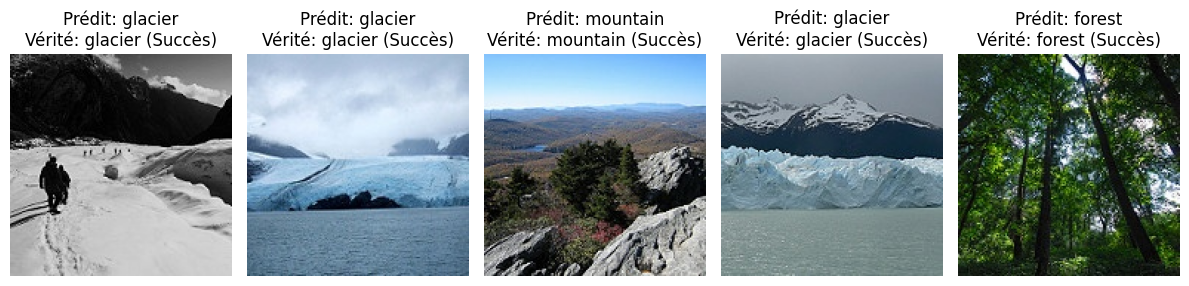

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2  # Utilisation de OpenCV

# Définir le chemin principal vers le dossier de test
dossier_test = "Intel_Images/Intel_Images/seg_test/seg_test"

# Définir les classes
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Fonction pour charger les chemins des images et leurs étiquettes
def charger_images(dossier_principal, classes):
    chemins_images = []
    etiquettes = []
    for classe in classes:
        dossier_classe = os.path.join(dossier_principal, classe)
        if os.path.exists(dossier_classe):  # Vérifier si le dossier existe
            for nom_fichier in os.listdir(dossier_classe):
                if nom_fichier.endswith(('.jpg', '.jpeg', '.png')):
                    chemin_image = os.path.join(dossier_classe, nom_fichier)
                    chemins_images.append(chemin_image)
                    etiquettes.append(classes.index(classe))  # Associer l'indice de la classe
        else:
            print(f"Le dossier {dossier_classe} n'existe pas.")
    return chemins_images, etiquettes

# Charger les images et les étiquettes
chemins_images, etiquettes_vraies = charger_images(dossier_test, classes)

# Mélanger les données
indices = list(range(len(chemins_images)))
random.shuffle(indices)

chemins_images = [chemins_images[i] for i in indices]
etiquettes_vraies = [etiquettes_vraies[i] for i in indices]

# Convertir les prédictions et les vraies étiquettes en tableaux NumPy
y_true = np.array(etiquettes_vraies)


def predict_image(chemin_image):
    return model.predict(chemin_image)


y_pred = np.array([predict_image(chemin_image) for chemin_image in chemins_images])

# Trouver les erreurs et les succès
erreurs = np.where(y_pred != y_true)[0]
succes = np.where(y_pred == y_true)[0]  # Indices des prédictions réussies

# Fonction pour afficher les images (erreurs ou succès)
def afficher_images(indices, type_affichage="erreur", nombre_images=5):
    nombre_a_afficher = min(nombre_images, len(indices))
    plt.figure(figsize=(12, 6))
    for i in range(nombre_a_afficher):
        index = indices[i]
        chemin_image = chemins_images[index]

        try:
            # Charger l'image avec OpenCV
            image = cv2.imread(chemin_image)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            plt.subplot(1, nombre_a_afficher, i + 1)
            plt.imshow(image)
            plt.axis('off')

            # Afficher le titre
            predicted_class_index = y_pred[index]
            true_class_index = y_true[index]  # Récupérer l'indice de la vraie classe

            if type_affichage == "erreur":
                plt.title(f"Prédit: {classes[predicted_class_index]}\nVérité: {classes[true_class_index]} (Erreur)")
            else:
                plt.title(f"Prédit: {classes[predicted_class_index]}\nVérité: {classes[true_class_index]} (Succès)")


        except Exception as e:
            print(f"Erreur lors de l'affichage de l'image {chemin_image}: {e}")
            continue

    plt.tight_layout()
    plt.show()


# Afficher quelques erreurs
afficher_images(erreurs, type_affichage="erreur")

# Afficher quelques succès
afficher_images(succes, type_affichage="succes")